# 3.1. [a,b)に含まれる整数の和 / Sum of integers in [a,b)

In [1]:
def sum(a, b):
    S = 0
    for i in range(a, b):
        S = S + i
    return S
sum(3, 10)

42

# 3.2. リストの和 / Sum of numbers in a list

In [2]:
def sumlist(l):
    S = 0
    for i in l:
        S = S + i
    return S
sumlist([3, 7, 9])

19

# 3.3. [a,b)に含まれる整数のリスト / List of integers in [a,b)

In [3]:
def my_range(a, b):
    l = []
    while a < b :
        l = l + [a]
        a = a + 1
    return l
my_range(0,10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 3.4. クイックソート / Quicksort

In [4]:
def qs(l):
    if l == []:
        return l
    else:
        base = l[0]
        large = [ x for x in l if x > base]
        small = [ x for x in l if x < base]
        return qs(small) + [base] + qs(large)
qs([8,5,7,2])

[2, 5, 7, 8]

# 3.5. 組み込みのライブラリモジュールの利用(random_ints) / Using builtin library modules (random_ints)

In [5]:
import random
def random_ints(a, n):
    i = 0
    l = []
    while i < n:
        l.append(random.randint(0, a))
        i = i + 1
    return l
print(random_ints(1000, 5))

[537, 408, 839, 948, 743]


# 3.6. 長いリストのソート / Sort a large list

In [6]:
def check_sorted(l):
    if l == []:
        return 1
    if len(l) == 1:
        return 1
    else:
        if l[0] <= l[1]:
            return check_sorted(l[1:])
        else:
            return 0
check_sorted([3,1,2])

0

In [7]:
def check_sorted_new(l):
    if all(l[i] <= l[i+1] for i in range(len(l)-1)):
        return 1
    else:
        return 0

In [8]:
check_sorted_new([1,2,4]) #I spent about 15 minitues to find why when list is sorted, return NONE, then I find python 
                     #is a little special 

1

In [9]:
def test_qs(n):
    l = random_ints(1000, n)
    nl = qs(l)
    return check_sorted_new(nl)
test_qs(100000)

1

# 3.7. 実行時間測定 / Measure execution time

In [10]:
import time
def measure_qs(n):
    l = random_ints(1000, n)
    start = time.time()
    nl = qs(l)
    end = time.time()
    print("OK %d elems in %f sec" % (n, end - start) )
measure_qs(100000)

OK 100000 elems in 0.085545 sec


# 3.8. クラスを使ってみる / Use a class

In [11]:
class point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def norm2(self):
        return self.x ** 2 + self.y ** 2
p = point(3, 4)
print(p)
print(p.x)
print(p.y)
print(p.norm2())

<__main__.point instance at 0x7f029c601d88>
3
4
25


# 3.10.1 Circleクラス / Circle class

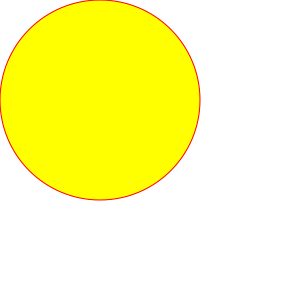

In [12]:
%%svg
<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<svg 
   xmlns="http://www.w3.org/2000/svg"
   width="300" height="300"
   viewBox="0 0 300 300" 
>
  <circle cx="100" cy="100" r="100" stroke="red" fill="yellow"/>
</svg>


In [13]:
class Circle(object):
    def __init__(self, cx, cy, r):
        self.cx = cx
        self.cy = cy
        self.r = r
        self.stroke = "black"
        self.fill = "white"
        self.var = []
    def to_svg(self):
        return ['<circle cx="%d" cy="%d" r="%d" stroke="%s" fill="%s"/>' % (self.cx, self.cy, self.r, self.stroke, self.fill)]
    def bb(self):
        return (self.cx - self.r, self.cy - self.r, 2 * self.r, 2* self.r)
c = Circle(100, 200, 70)
print(c.to_svg())
print(c.bb())

['<circle cx="100" cy="200" r="70" stroke="black" fill="white"/>']
(30, 130, 140, 140)


# 3.10.2 Rectクラス / Rect class

In [14]:
class Rect(object):
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.stroke = "black"
        self.fill = "white"
    def to_svg(self):
        return ['<rect x="%d" y="%d" width="%d" height="%d" stroke="%s" fill="%s"/>' % (self.x, self.y, self.width, self.height, self.stroke, self.fill)]
    def bb(self):
        return (self.x, self.y, self.width, self.height)
r = Rect(300, 400, 80, 90)
print(r.to_svg())
print(r.bb())

['<rect x="300" y="400" width="80" height="90" stroke="black" fill="white"/>']
(300, 400, 80, 90)


# 3.10.3. SVGCanvasクラス / SVGCanvas class

In [15]:
class SVGCanvas(Rect,Circle):
    def __init__(self):
        self.w = -1000#max(Rect.bb()[0] + Rect.bb()[2] , Circle.bb()[0] + Circle.bb()[2]) - min(Rect.bb()[0], Circle.bb()[0])
        self.h = -1000#max(Rect.bb()[1] + Rect.bb()[3] , CirCle.bb()[1] + Circle.bb()[3]) - min(Rect.bb()[1], Circle.bb()[1])
        self.x = 1000#min(Rect.bb()[0], Circle.bb()[0])
        self.y = 1000#min(Rect.bb()[1], Rect.bb()[1])
        self.var = []
        #return var 
    def add(self, shape):
            self.x = min(self.x, shape.bb()[0])
            self.y = min(self.y, shape.bb()[1])
            self.w = max(self.w, (shape.bb()[0] + shape.bb()[2]) - self.x)
            self.h = max(self.w, (shape.bb()[1] + shape.bb()[3]) - self.y)
            self.var = self.var + shape.to_svg()
    def to_svg(self):
        self.var = [
                "<svg",
                "\txmlns=\"http://www.w3.org/2000/svg\"",
                "\twidth=\"%d\"" % self.w,
                "\theight=\"%d\"" % self.h,
                "\tviewBox=\"%d %d %d %d\"" % (self.x, self.y, self.w, self.h),
                ">"] + self.var + ["</svg>"]
        str = ""
        for i in self.var:
            str = str + i + '\n'
        return str

In [16]:
sc = SVGCanvas()
sc.add(c)
sc.add(r)
print(sc.to_svg())

<svg
	xmlns="http://www.w3.org/2000/svg"
	width="350"
	height="360"
	viewBox="30 130 350 360"
>
<circle cx="100" cy="200" r="70" stroke="black" fill="white"/>
<rect x="300" y="400" width="80" height="90" stroke="black" fill="white"/>
</svg>



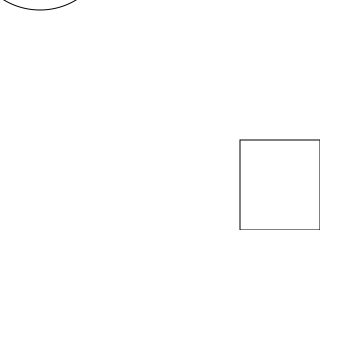

In [17]:
from IPython.display import SVG
SVG(sc.to_svg())

# 3.10.4. 共通の親クラス ClosedShape / A common parent class ClosedShape

In [18]:
class ClosedShape(object):
    def __init__(self):
        self.fill = "none"
        self.stroke = "black"
    def set_fill(self, color):
        self.fill = color
    def set_stroke(self, color):
        self.stroke = color
class rect(ClosedShape):
      def __init__(self):
            ClosedShape.__init__(self)
      def to_svg(self, shape): 
            return ['<rect x="%d" y="%d" width="%d" height="%d" stroke="%s" fill="%s"/>' % (shape.x, shape.y, shape.width, shape.height, self.stroke, self.fill)]
class circle(ClosedShape):
      def __init__(self,):
            ClosedShape.__init__(self)
      def to_svg(self, shape):
            return ['<circle cx="%d" cy="%d" r="%d" stroke="%s" fill="%s"/>' % (shape.cx, shape.cy, shape.r, self.stroke, self.fill)]
s = rect()
s.set_fill("yellow")
print(s.to_svg(r))
s.set_stroke("red")
print(s.to_svg(r))

['<rect x="300" y="400" width="80" height="90" stroke="black" fill="yellow"/>']
['<rect x="300" y="400" width="80" height="90" stroke="red" fill="yellow"/>']


# 3.10.5. その他の図形クラス(任意) / Other shape classes (optional)

In [19]:
class Text(object):
    def __init__(self, x, y, rx, ry, rw, rh, string):
        self.x = x
        self.y = y
        self.rx = rx
        self.ry = ry
        self.rw = rw
        self.rh = rh
        self.fill = "blue"
        self.string = string
    def prepare(self):
        return ['<?xml version="1.0" standalone="no"?><!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">']
    def back(self):
        return ['<svg width="10cm" height="3cm" viewBox="0 0 1000 300" xmlns="http://www.w3.org/2000/svg" version="1.1">']
    def to_svg(self):
        return ['<text x="%d" y="%d" font-family = "Verdana" font-size = "55" fill="%s"> %s </text>' % (self.x, self.y, self.fill, self.string)] 
    def rect(self):
        return ['<rect x="%d" y="%d" width="%d" height="%d" fill="none" stroke="blue" stroke-width="2" /> ' % (self.rx, self.ry, self.rw, self.rh)]
    def printall(self):
        s = []
        s = s + self.prepare() + self.back() + self.to_svg() + self.rect() + ['</svg>']
        str = ""
        for i in s:
            str = str + i
        return str
        

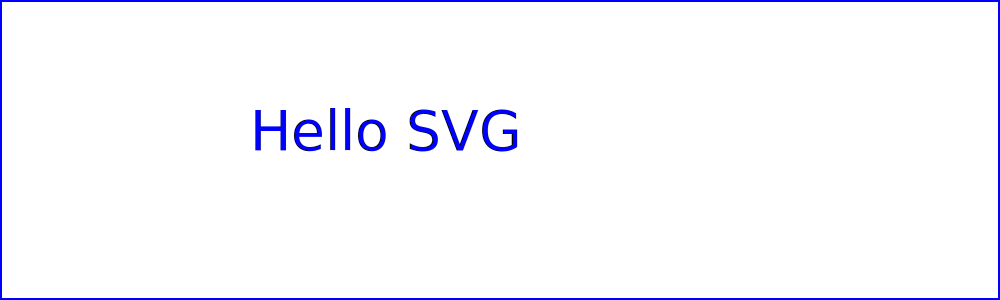

In [20]:
s = "Hello SVG"
r = Text(250,150, 1, 1, 998, 298, s) # x, y of string rx, ry, rw, rh of rect line , and string 
from IPython.display import SVG
SVG(r.printall())

# 3.10.6. 多数の図形の生成 / Generate many shapes

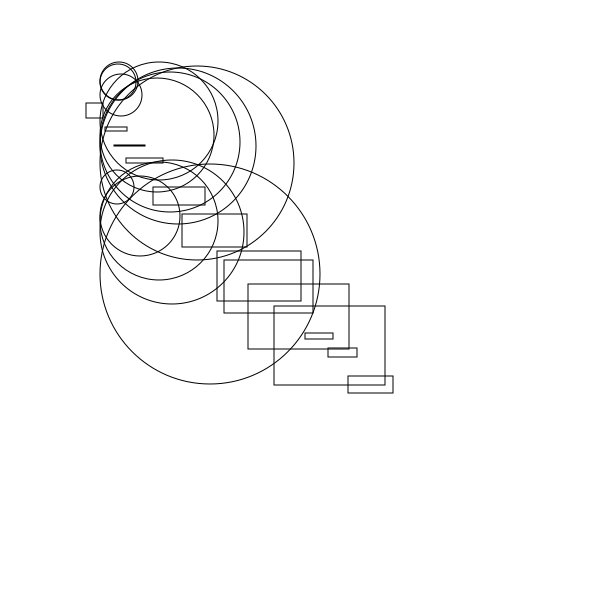

In [21]:
import matplotlib.pyplot as plt   
def Random():
    n = SVGCanvas()
    i = 0
    cache = []
    while (i <= 25):
        i = i + 1
        number =  random.randint(0, 200) 
        number2 = random.randint(10,20)
        if number % 2 == 0:
            s = circle()
            s.set_fill("none")
            #print(s.to_svg(Circle(number %100, number + 5, number %100)))
            cache += s.to_svg(Circle(number %100 +number2 , number - number2, number %100 + number2 ))
            #n.add(Circle(number %100, number + 5, number %100)) 
        else:
            s = rect()
            s.set_fill("none")
            #print(s.to_svg(Rect(number * 2, 80 * number, 20 * number, 20 * number)))
            cache += s.to_svg(Rect(number * 2 - number2 ,  number * 2 + number2 , number % 100 + number2 , number %100 - number2 ))
    return cache
def painting(cache):
    f = open('sample.svg', 'w+')# I try to write the lines into sample.svg file to save it but it failed
    var = [
                "<svg",
                "\txmlns=\"http://www.w3.org/2000/svg\"",
                "\twidth=\"600\" ",
                "\theight=\"600\" ",
                "\tviewBox=\"-100 -100 600 600\"",
                ">"] + cache + ["</svg>"]
    str = ""
    for i in var:
        str = str + i + '\n'
        f.write(i)
    f.close()
    return str
from IPython.display import SVG
SVG(painting(Random()))       

In [22]:
#to prove that I have save the file
f = open('sample.svg', 'r')
for line in f:
    print(line)
f.close

<svg	xmlns="http://www.w3.org/2000/svg"	width="600" 	height="600" 	viewBox="-100 -100 600 600"><rect x="14" y="46" width="31" height="-1" stroke="black" fill="none"/><circle cx="78" cy="46" r="78" stroke="black" fill="none"/><circle cx="97" cy="63" r="97" stroke="black" fill="none"/><rect x="117" y="151" width="84" height="50" stroke="black" fill="none"/><circle cx="70" cy="42" r="70" stroke="black" fill="none"/><rect x="205" y="239" width="28" height="-6" stroke="black" fill="none"/><rect x="26" y="58" width="37" height="5" stroke="black" fill="none"/><circle cx="19" cy="-19" r="19" stroke="black" fill="none"/><circle cx="110" cy="174" r="110" stroke="black" fill="none"/><rect x="148" y="184" width="101" height="65" stroke="black" fill="none"/><rect x="174" y="206" width="111" height="79" stroke="black" fill="none"/><circle cx="72" cy="132" r="72" stroke="black" fill="none"/><rect x="248" y="276" width="45" height="17" stroke="black" fill="none"/><rect x="-14" y="18" width="17" height

<function close>

# 3.11. 2分探索木 / Binary search tree

In [23]:
class bs_tree_node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class bs_tree():
    def __init__(self):
        self.root = None
        self.l = []
    def insert(self, value):
        if self.root is None:
            self.root = bs_tree_node(value)
        else: 
            self.add(value, self.root)
    def add(self, value, node):
            if(value <= node.value):
                if node.left == None:
                    node.left = bs_tree_node(value)
                    return
                else:
                    return self.add(value, node = node.left)
            else:
                if node.right == None:
                    node.right = bs_tree_node(value)
                    return 
                else:
                    return self.add(value, node = node.right)
t = bs_tree()
t.insert(10)
t.insert(8)
t.insert(15)
print("the value of t.root is", t.root.value)

('the value of t.root is', 10)


# 3.12. 2分探索木の要素の昇順リスト / Ascending list of elements in a binary search tree

In [24]:
class bs_tree():
    def __init__(self):
        self.root = None
        self.l = []
    def insert(self, value):
        if self.root is None:
            self.root = bs_tree_node(value)
        else: 
            self.add(value, self.root)
    def add(self, value, node):
            if(value <= node.value):
                if node.left == None:
                    node.left = bs_tree_node(value)
                    return
                else:
                    return self.add(value, node = node.left)
            else:
                if node.right == None:
                    node.right = bs_tree_node(value)
                    return 
                else:
                    return self.add(value, node = node.right)
    def all_vals_list(self):
        if(self.root != None):
            self.all_vals_run(self.root)
            print(self.l)
    def all_vals_run(self, node):
        if node != None:
            self.all_vals_run(node = node.left)
            self.l = self.l + [node.value]
            self.all_vals_run(node = node.right)
t = bs_tree()
t.insert(10)
t.insert(8)
t.insert(15)
t.all_vals_list()
print(t.root.left.value)

[8, 10, 15]
8


# 3.13. 2分探索木の要素の昇順イテレータ / An iterator generating elements of a binary tree in the ascending order

In [25]:
class bs_tree2(object):
    def __init__(self, tree = None):
        self.stack = []
        self.tree = tree.root
        while self.tree != None:
            self.stack.append(self.tree)
            self.tree = self.tree.left
    def __iter__(self):
        return self
    def __next__(self):
        if len(self.stack)>0:
            self.tree = self.stack.pop()
            temp = self.tree
            self.tree = self.tree.right
            while(self.tree!=None):
                self.stack.append(self.tree)
                self.tree = self.tree.left
            return temp.value
        else:
            raise StopIteration
    def next(self):
        return self.__next__()
t = bs_tree2(t)
t
for i in t:
    print(i)

8
10
15


# 3.14. 2分探索木の可視化(任意) / Visualize a binary search tree (optional)